In [7]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
import pandas as pd
df_train = pd.read_csv(r"clean_train.csv",nrows = 2000000)
df_test = pd.read_csv(r"test.csv")
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
df_train, df_val = train_test_split(df_train, test_size=0.10, random_state=1)

val_target = df_val['fare_amount'].values

In [10]:
def distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    return np.abs(dropoff_lat - pickup_lat) + np.abs(dropoff_long - pickup_long)   
    
def add_new_features(df):
    plat = df['pickup_latitude']
    dlat = df['dropoff_latitude']
    plon = df['pickup_longitude']
    dlon = df['dropoff_longitude']

    
    df['latitude_diff'] = (plat - dlat)
    df['longitude_diff'] = (plon - dlon)
    
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year
    df['weekday'] = df['pickup_datetime'].dt.weekday
    df['quarter_of_year'] = df['pickup_datetime'].dt.quarter
    df['trip_distance_km'] = distance(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)
    
    return df


df_train = add_new_features(df_train)
df_val = add_new_features(df_val)
df_test = add_new_features(df_test)

test_x = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]
train_x = df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]
val_x = df_val[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]

train_y = df_train.fare_amount
val_y = df_val.fare_amount


In [13]:
from keras.layers import BatchNormalization


import keras.backend as K


def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


model = Sequential()
model.add(Dropout(0.2,input_shape=(train_x.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(30,activation='relu'))#30 neurons in input layer
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))#15 neurons in input layer
model.add(BatchNormalization())
model.add(Dense(1)) # 1 neuron in output layer


model.compile(optimizer='adam',loss='mse', metrics=[rmse])

estimator = model.fit(x=train_x,y=train_y, batch_size=1000, epochs=80, 
                    verbose=1, validation_data=(val_x,val_y), 
                    shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 943717 samples, validate on 104858 samples
Epoch 1/80
943717/943717 [==============================] - 6s 7us/step - loss: 77.1124 - rmse: 5.9732 - val_loss: 38.7799 - val_rmse: 3.2019
Epoch 2/80
943717/943717 [==============================] - 5s 6us/step - loss: 27.4404 - rmse: 2.6371 - val_loss: 33.8961 - val_rmse: 2.7737
Epoch 3/80
943717/943717 [==============================] - 6s 6us/step - loss: 26.8494 - rmse: 2.6010 - val_loss: 33.6397 - val_rmse: 2.8026
Epoch 4/80
943717/943717 [==============================] - 5s 6us/step - loss: 26.5170 - rmse: 2.5689 - val_loss: 33.2596 - val_rmse: 2.8095
Epoch 5/80
943717/943717 [==============================] - 5s 5us/step - loss: 26.0766 - rmse: 2.5400 - val_loss: 31.7262 - val_rmse: 2.6945
Epoch 6/80
943717/943717 [==============================] - 6s 6us/step - loss: 25.7600 - rmse: 2.5262 - val_loss: 32.

943717/943717 [==============================] - 6s 6us/step - loss: 24.5668 - rmse: 2.4542 - val_loss: 32.2886 - val_rmse: 2.7065
Epoch 55/80
943717/943717 [==============================] - 6s 6us/step - loss: 24.6575 - rmse: 2.4546 - val_loss: 32.7903 - val_rmse: 2.7213
Epoch 56/80
943717/943717 [==============================] - 6s 6us/step - loss: 24.6476 - rmse: 2.4564 - val_loss: 29.1728 - val_rmse: 2.4573
Epoch 57/80
943717/943717 [==============================] - 6s 6us/step - loss: 24.6207 - rmse: 2.4538 - val_loss: 30.3880 - val_rmse: 2.5830
Epoch 58/80
943717/943717 [==============================] - 6s 6us/step - loss: 24.5686 - rmse: 2.4539 - val_loss: 30.1817 - val_rmse: 2.5236
Epoch 59/80
943717/943717 [==============================] - 7s 7us/step - loss: 24.6992 - rmse: 2.4566 - val_loss: 31.4254 - val_rmse: 2.6868
Epoch 60/80
943717/943717 [==============================] - 6s 6us/step - loss: 24.6390 - rmse: 2.4568 - val_loss: 32.6953 - val_rmse: 2.6834
Epoch 61/80

In [14]:
ypred=model.predict(val_x,verbose=1)

104858/104858 [==============================] - 3s 31us/step


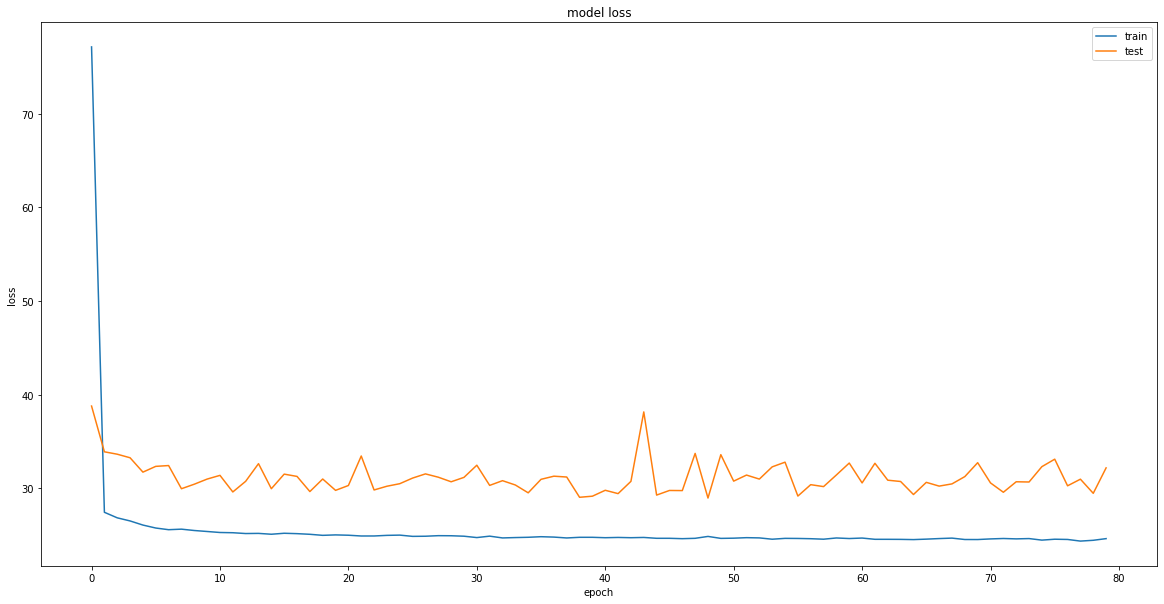

In [15]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
plot_loss_accuracy(estimator)

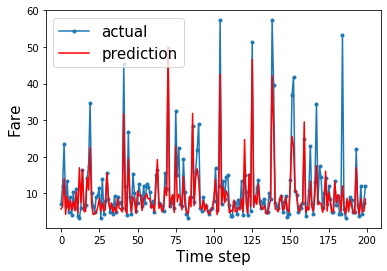

In [16]:
aa=[x for x in range(200)]
plt.plot(aa, val_y[:200], marker='.', label="actual")
plt.plot(aa, ypred[:200], 'r', label="prediction")
plt.ylabel('Fare', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(val_y,ypred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.673


### Reference
#### https://keras.io/getting-started/sequential-model-guide/